In [3]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from transparentai.datasets import load_adult
from transparentai import fairness
from transparentai.datasets import variable
from transparentai.models import classification
from transparentai.models import explainers

In [2]:
data = load_adult()
X, Y = data.drop(columns='income'), data['income']
X = X.select_dtypes('number')
Y = Y.replace({'>50K':1, '<=50K':0})
X_train, X_valid, y_true, y_true_valid = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [3]:
y_true       = Y_train
y_true_valid = Y_valid
y_pred       = clf.predict_proba(X_train)
y_pred_valid = clf.predict_proba(X_valid)

In [4]:
privileged_group = {'gender': ['Male']}

df_valid = data.loc[X_valid.index,:]
df_train = data.loc[X_train.index,:]

In [5]:
%matplotlib inline

In [7]:
classification.plot_performance

<function transparentai.models.classification.classification_plots.plot_performance(y_true, y_pred, y_true_valid=None, y_pred_valid=None, metrics=None, **kwargs)>

In [8]:
figs = [fig1, fig2, fig3, fig4, fig5]

In [9]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('foo.pdf')
for f in figs:
    pp.savefig(f)
pp.close()

In [97]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

from transparentai.datasets import variable
from transparentai.models import classification, explainers, regression
from datetime import datetime

def generate_head_page():
    """
    """
    fig = plt.figure(figsize=(8.27,11.69))

    document_title = 'Validation report'
    text = 'In this document you can find:'
    details = ''
    details += '\n- A histogram of the y_true variable'
    details += '\n- Model performance graphics'
    details += '\n- Model feature importance'

    plt.text(0.5, 0.75, document_title, fontsize=23,  
             ha='center',
             va='center',
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

    plt.text(0.5, 0.35, text, fontsize=15, ha='center', va='center')
    plt.text(0.5 - 0.25, 0.3, details, fontsize=13, ha='left', va='center')

    date = datetime.today().strftime('%Y-%m-%d')
    plt.text(0.5, 0.65, date, fontsize=15, ha='center', va='center')

    plt.axis('off')

    return fig


In [4]:
from transparentai import utils

In [5]:
from transparentai.datasets import load_adult
from sklearn.ensemble import RandomForestClassifier

data = load_adult()
X, Y = data.drop(columns='income'), data['income']
X = X.select_dtypes('number')
Y = Y.replace({'>50K':1, '<=50K':0})
X_train, X_valid, y_true, y_true_valid = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train,y_true)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Generating y_true distribution
Generating model performance


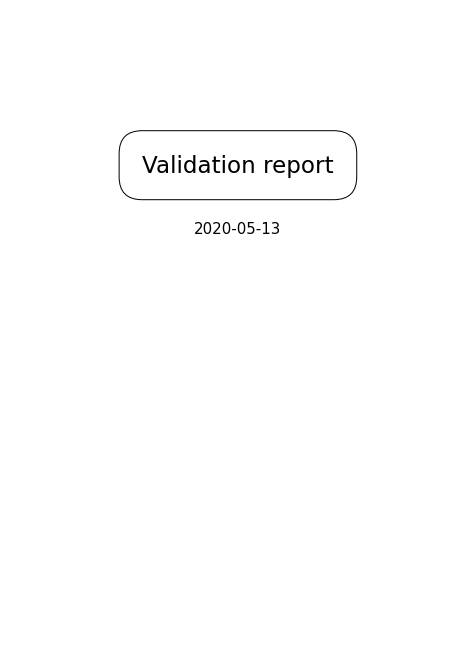

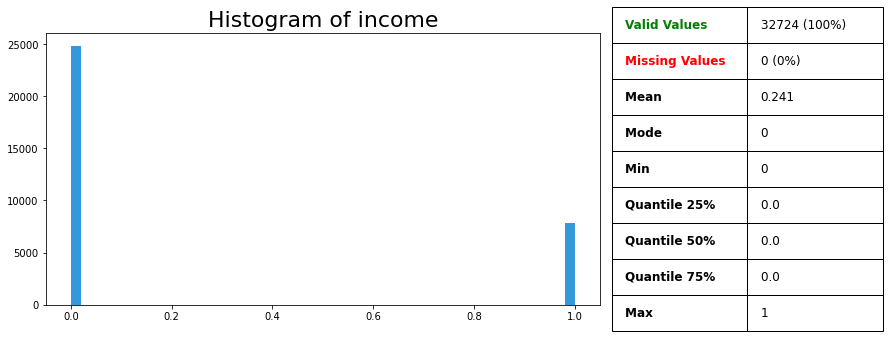

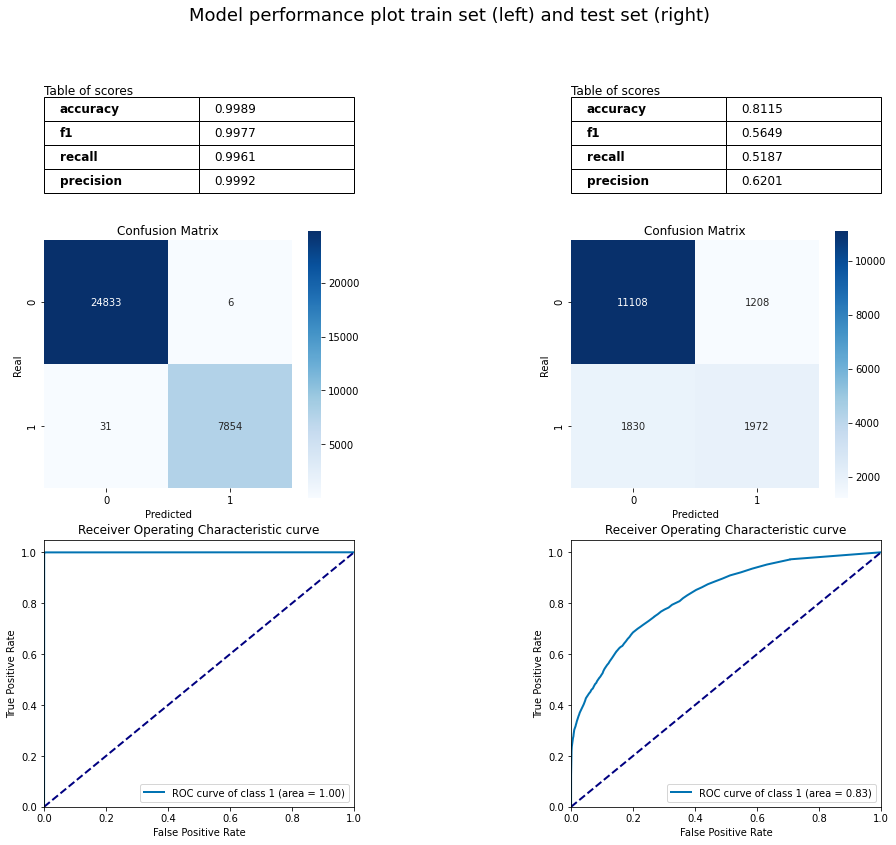

Generating model feature influence (over 10 samples)
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']



report generated at validation_report.pdf


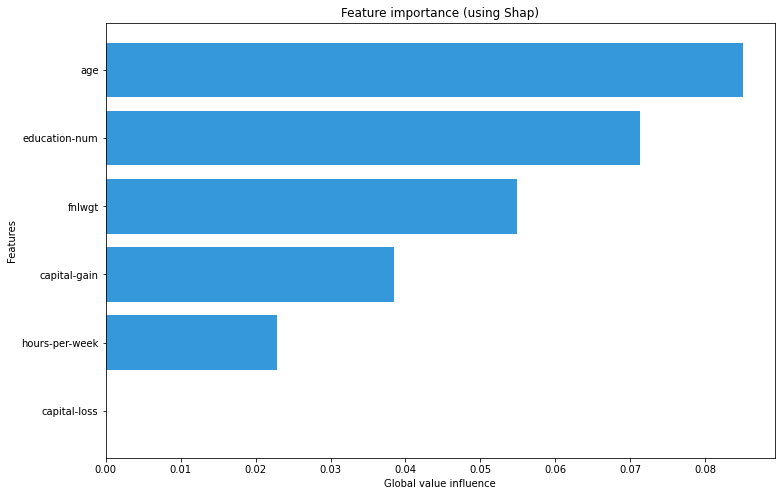

In [6]:
utils.generate_validation_report(clf, X_train, y_true, X_valid, y_true_valid)

In [7]:
from transparentai.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

data = load_iris()
X, Y = data.drop(columns='iris plant'), data['iris plant']
Y = Y.replace({'setosa':0, 'versicolor':1, 'virginica':2})
clf = RandomForestClassifier().fit(X,Y)
X_train, X_valid, y_true, y_true_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

Generating y_true distribution
Generating model performance


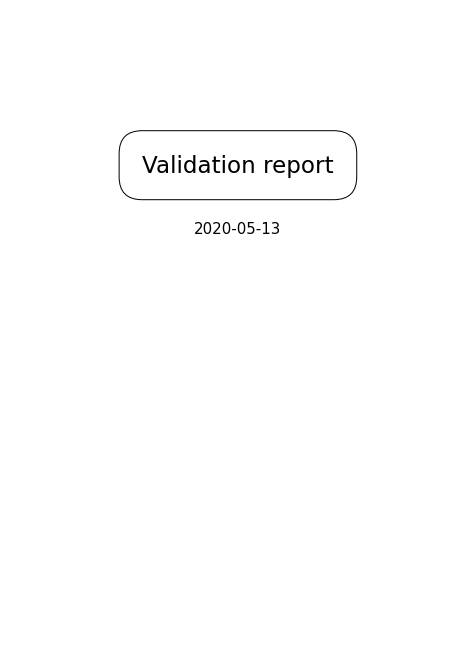

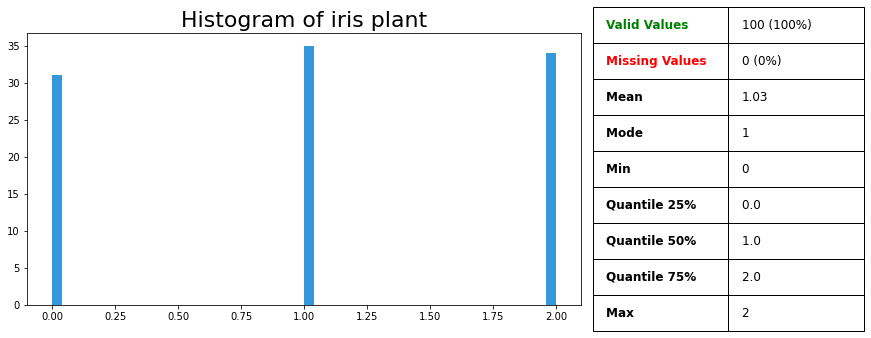

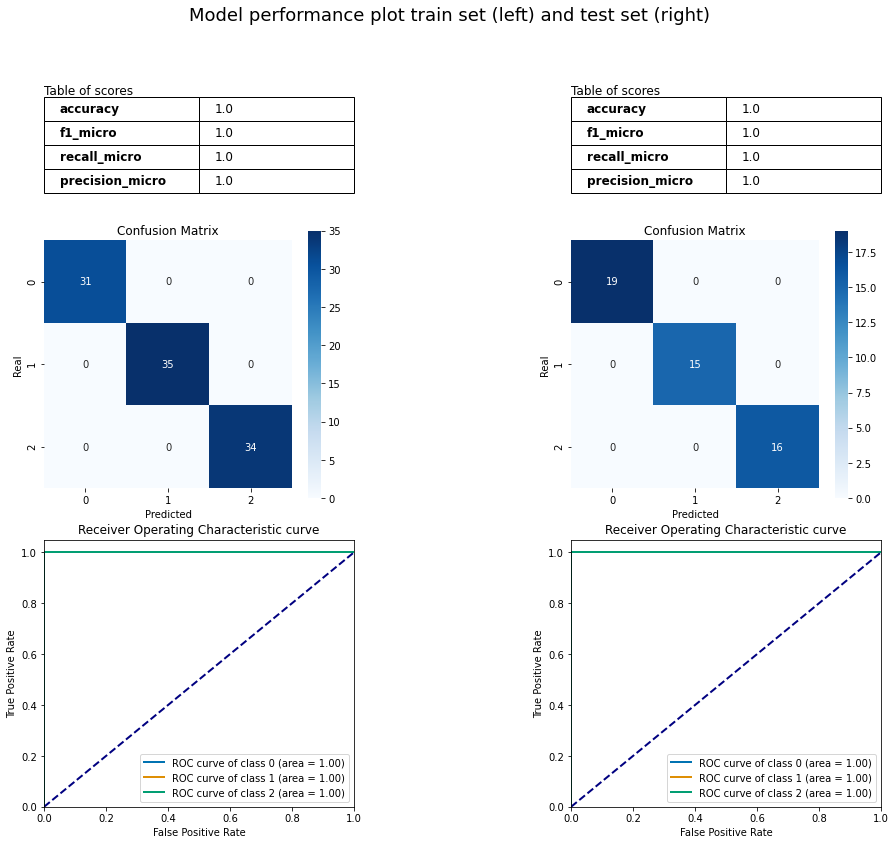

Generating model feature influence (over 10 samples)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']



report generated at multi_label.pdf


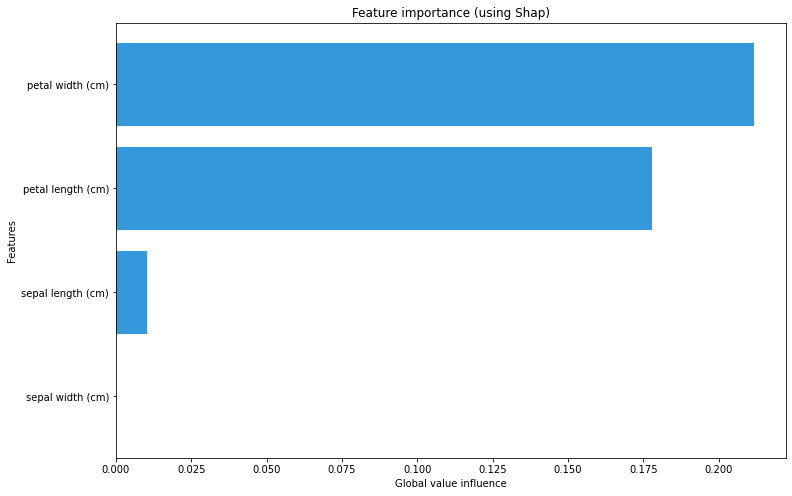

In [8]:
utils.generate_validation_report(clf, X_train, y_true, X_valid, y_true_valid, out='multi_label.pdf')

In [11]:
from transparentai.datasets import load_boston
from sklearn.linear_model import LinearRegression

data = load_boston()
X, Y = data.drop(columns='MEDV'), data['MEDV']
regr = LinearRegression().fit(X, Y)
X_train, X_valid, y_true, y_true_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

Generating y_true distribution
Generating model performance
Generating model feature influence (over 10 samples)
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']



report generated at regr.pdf


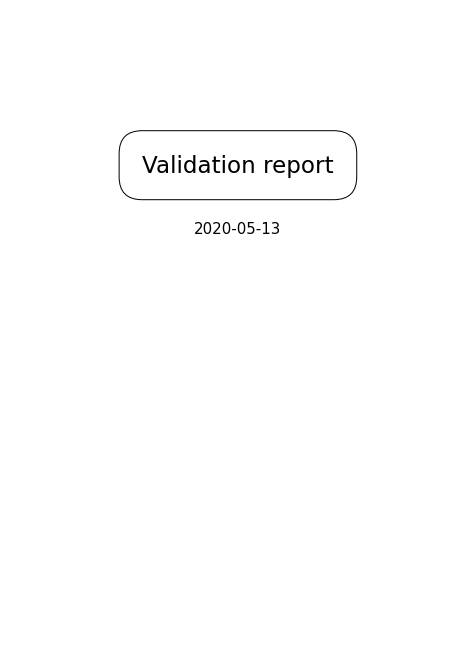

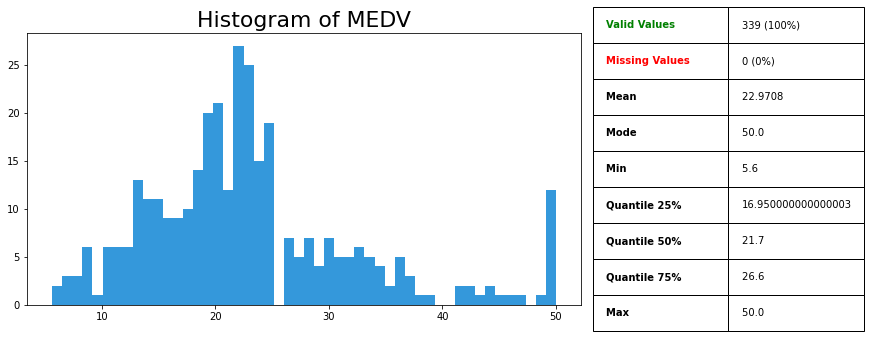

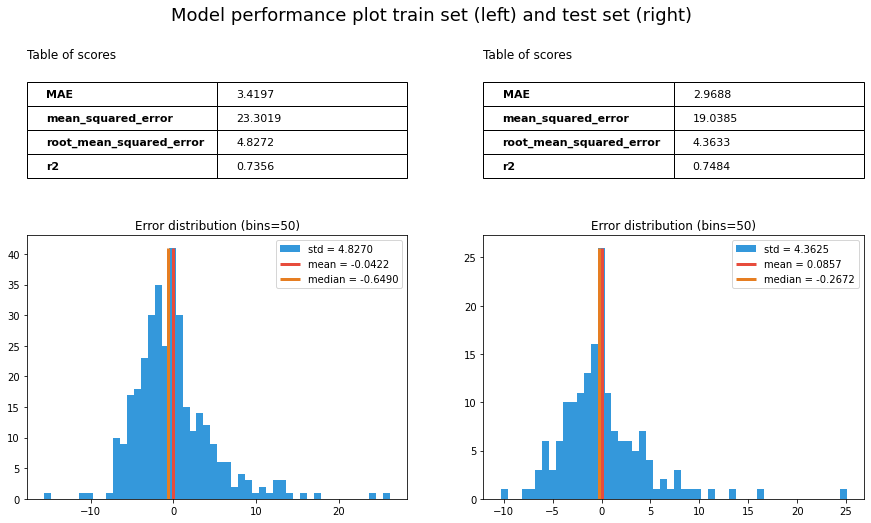

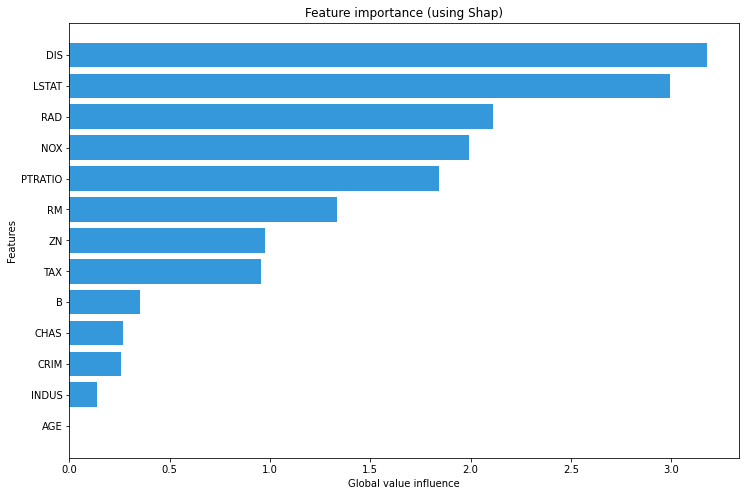

In [12]:
utils.generate_validation_report(regr, X_train, y_true, X_valid, y_true_valid, 
                                 model_type='regression', out='regr.pdf')